<a href="https://colab.research.google.com/github/konrad-l/waviness_prediction/blob/main/CNC_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df_raw = pd.read_excel('Wt_CNC.xlsx')
df = df_raw.copy()

In [ ]:
df.head()

,α [°],θ [°],Prędkość osiowa Vu [mm/s],Gniot δ [-],Fx [kN],Fr [kN],M [Nm],Wz [μm]
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   α [°]                      81 non-null     int64  
 1   θ [°]                      81 non-null     float64
 2   Prędkość osiowa Vu [mm/s]  81 non-null     int64  
 3   Gniot δ [-]                81 non-null     float64
 4   Fx [kN]                    70 non-null     float64
 5   Fr [kN]                    70 non-null     float64
 6   M [Nm]                     70 non-null     float64
 7   Wz [μm]                    70 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 5.2 KB


In [ ]:
df.columns = ['alfa', 'tetha', 'Vu', 'gniot', 'Fx', 'Fr', 'M', 'Wz']
df.head()

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6


In [ ]:
df[df['Wz'].isnull() == True]

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz
6,15,2.5,40,1.13,NaN,NaN,NaN,NaN
7,15,2.5,40,1.30,NaN,NaN,NaN,NaN
8,15,2.5,40,1.53,NaN,NaN,NaN,NaN
17,20,2.5,40,1.53,NaN,NaN,NaN,NaN
24,25,2.5,40,1.13,NaN,NaN,NaN,NaN
25,25,2.5,40,1.30,NaN,NaN,NaN,NaN
26,25,2.5,40,1.53,NaN,NaN,NaN,NaN
54,15,7.5,10,1.13,NaN,NaN,NaN,NaN
56,15,7.5,10,1.53,NaN,NaN,NaN,NaN
63,20,7.5,10,1.13,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna().reset_index(drop=True)
df = df.round(2)
df

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz
0,15,2.5,10,1.13,3.81,34.81,360.84,123.5
1,15,2.5,10,1.30,4.50,46.91,487.34,48.3
2,15,2.5,10,1.53,9.20,49.44,519.86,45.1
3,15,2.5,20,1.13,2.95,28.16,396.28,118.7
4,15,2.5,20,1.30,9.93,42.39,600.23,52.6
...,...,...,...,...,...,...,...,...
65,25,7.5,20,1.30,0.84,32.88,701.94,125.1
66,25,7.5,20,1.53,12.34,38.16,786.54,199.6
67,25,7.5,40,1.13,3.84,26.14,589.82,280.1
68,25,7.5,40,1.30,9.26,38.16,932.41,113.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   alfa    70 non-null     int64  
 1   tetha   70 non-null     float64
 2   Vu      70 non-null     int64  
 3   gniot   70 non-null     float64
 4   Fx      70 non-null     float64
 5   Fr      70 non-null     float64
 6   M       70 non-null     float64
 7   Wz      70 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 4.5 KB


In [ ]:
df.corr()

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz
alfa,1.000000,0.043133,-0.036881,0.002977,0.334302,-0.382654,-0.061227,0.206879
tetha,0.043133,1.000000,0.265283,0.020517,-0.450355,-0.073572,0.494799,0.588393
Vu,-0.036881,0.265283,1.000000,-0.023870,0.268592,0.031388,0.548960,0.143914
gniot,0.002977,0.020517,-0.023870,1.000000,0.549815,0.793421,0.590897,-0.459641
Fx,0.334302,-0.450355,0.268592,0.549815,1.000000,0.343027,0.305656,-0.475014
Fr,-0.382654,-0.073572,0.031388,0.793421,0.343027,1.000000,0.616874,-0.584735
M,-0.061227,0.494799,0.548960,0.590897,0.305656,0.616874,1.000000,-0.100229
Wz,0.206879,0.588393,0.143914,-0.459641,-0.475014,-0.584735,-0.100229,1.000000


Text(0.5, 1.0, 'Heatmap')

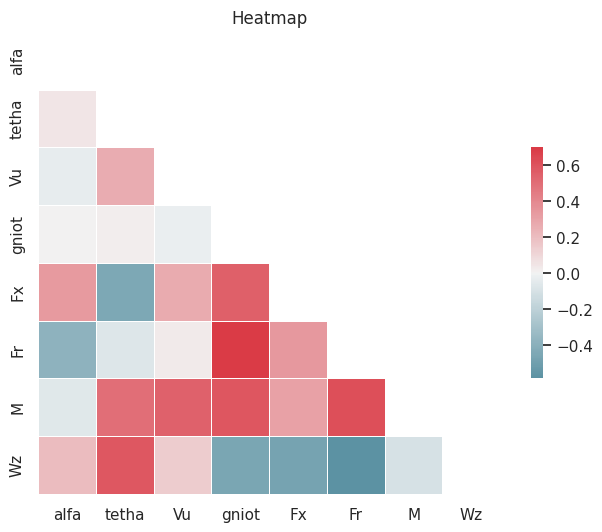

In [ ]:
corr = df.corr()

sns.set(style='white')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
ax.set_title('Heatmap')

**Support Vector Regression "SVR"**

In [ ]:
data_raw = df.values
target = data_raw[:,7]
print('target shape:', target.shape)

data = data_raw[:,:4]
print('data shape:', data.shape)

target shape: (70,)
data shape: (70, 4)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (49, 4)
X_test shape (21, 4)
y_train shape (49,)
y_test shape (21,)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

svr = SVR(C=8.0, epsilon=0.2, kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

r2_score(y_test, y_pred)

0.5750198468165069

In [ ]:
# linear: 
# sigmoid: SVR(C=82.0, epsilon=0.2, kernel='sigmoid') - r2=0,82

**Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

regressor = SVR()

params = {'kernel': ['linear', 'sigmoid'] ,
          'C': np.arange(1, 100, 1),
          'epsilon': np.arange(0.1, 20, 0.1),
          }

grid_search = GridSearchCV(regressor, param_grid=params, scoring='r2', cv=7)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=SVR(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'ep...
       13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2, 14.3,
       14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4,
       15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4, 16.5,
       16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5, 17.6,
       17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7,
       18.8, 18.9, 19. , 19.1, 19.2, 19.3, 19.4, 19.5, 19.6, 19.7, 19.8,
       19.9]),
                         'kernel': ['linear', 'sigmoid']},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'C': 38, 'epsilon': 4.3, 'kernel': 'linear'}

In [ ]:
svr = SVR(C=20.0, epsilon=1.0, kernel='sigmoid')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

r2_score(y_test, y_pred)

0.7296090678501261

In [ ]:
svr = SVR(C=25.0, epsilon=0.1, kernel='sigmoid')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

r2_score(y_test, y_pred)

0.7542691618291584

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=svr, X=X_train, y=y_train, cv=7)
scores

array([-0.6743938 ,  0.25660427,  0.75170625,  0.41770415,  0.46262745,
        0.46391932,  0.53109294])

In [ ]:
predictions = pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred})
predictions.head()

,y_test,y_pred
0,75.5,76.189984
1,123.5,122.303385
2,177.1,174.562329
3,52.6,67.906268
4,148.6,186.263852


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predictions.index, y=predictions['y_test'], mode='lines', name='y_test'))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions['y_pred'], mode='lines', name='y_pred'))
fig.update_layout(height=500, width=900, title_text="Falistość - Random Forest",
                  xaxis_title='Number of probes', yaxis_title='Wt')

**Biblioteka SHAP (Wartość Shapley’a)**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 14.8 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
explainer = shap.KernelExplainer(svr.predict, X_train)

In [ ]:
shap_values = explainer.shap_values(X_test)
print(f'Shape: {shap_values.shape}')
pd.DataFrame(shap_values).head()

  0%|          | 0/21 [00:00<?, ?it/s]

Shape: (21, 4)


,0,1,2,3
0,-13.201933,-3.681465,-0.590141,-39.471606
1,-7.849602,-50.820948,8.875866,38.962941
2,-11.358469,46.623002,2.239521,3.923147
3,-11.548200,-54.548454,-0.825174,1.692967
4,-0.038888,45.602595,3.311257,4.253760


In [ ]:
column_names = ['α', 'θ', 'Vu', 'δ']

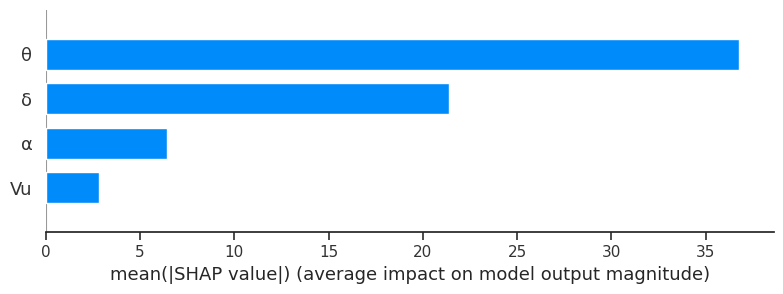

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=column_names)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


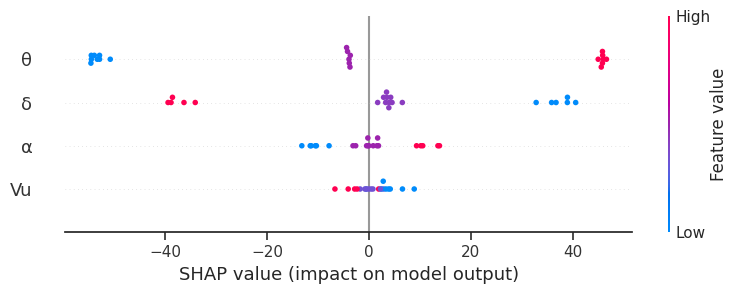

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=column_names)

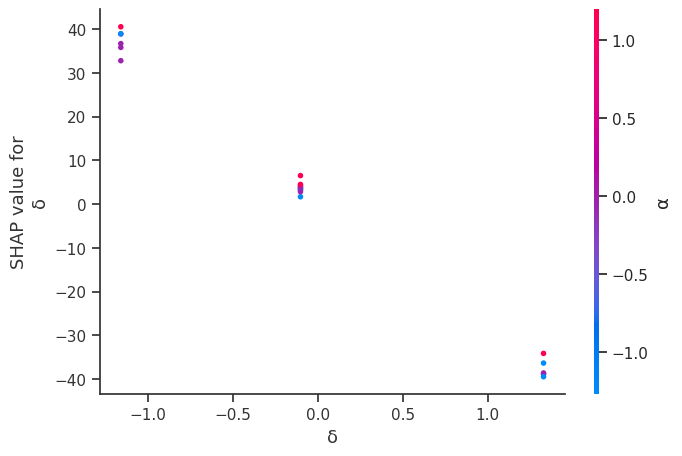

In [ ]:
# Wykres zależności

shap.dependence_plot(3, shap_values, X_test, feature_names=column_names)

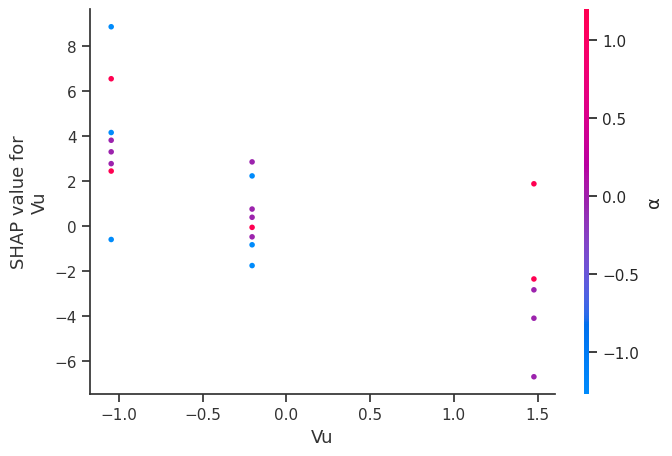

In [ ]:
shap.dependence_plot(2, shap_values, X_test, feature_names=column_names)

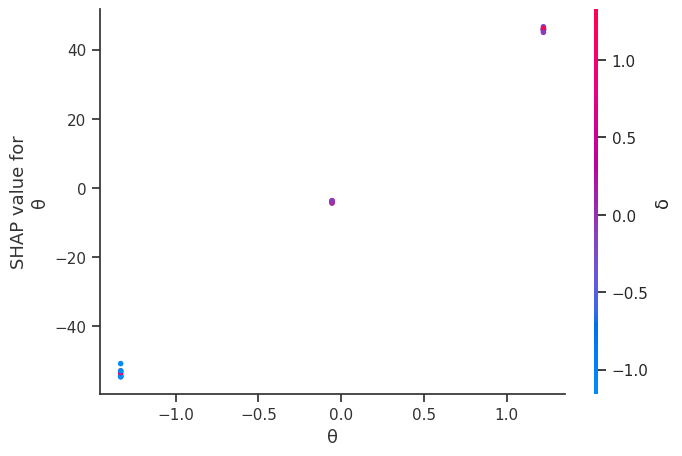

In [ ]:
shap.dependence_plot(1, shap_values, X_test, feature_names=column_names)

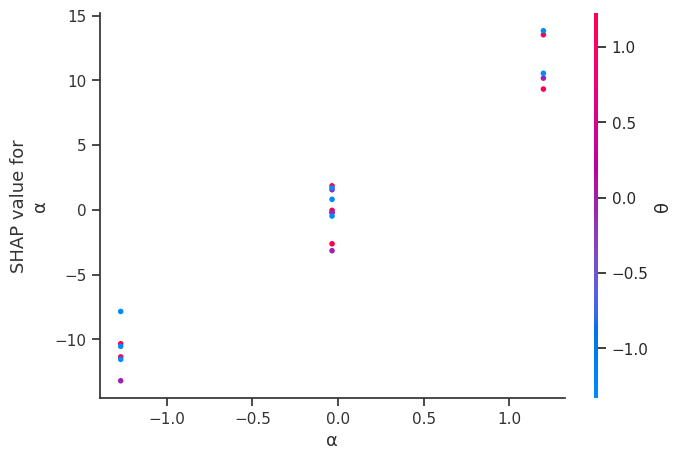

In [ ]:
shap.dependence_plot(0, shap_values, X_test, feature_names=column_names)

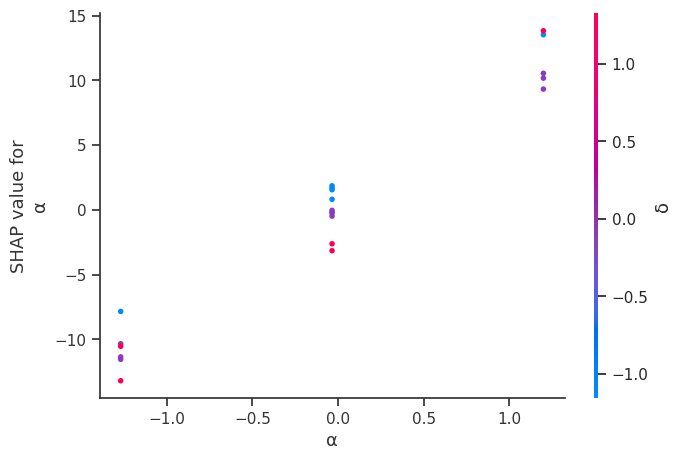

In [ ]:
shap.dependence_plot(0, shap_values, X_test, feature_names=column_names, interaction_index="δ")